***

<center> <h1><font color="blue"> Data Description :<font color="gray"> This dataset is made up of 1797 8x8 images. Each image, is of a hand-written digit. </font> </font></h1> </center> 

<center> <h1><font color="red"> TASK : <font color="gray">Train a model to identify or predict the written images based on the data. Use different different model technique to train model and find Accuracy.</font> </font></h1> </center> 

***

### Import library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt      # It's used for visualization of the data in 2 -D graph
import seaborn as sns                # It's used for make attractive and informative statistical graphics
import warnings                      # import warning 
warnings.filterwarnings('ignore')    # ignore or not print warnings

In [2]:
# load the iris dataset 

from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

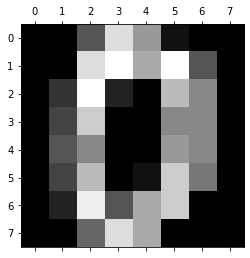

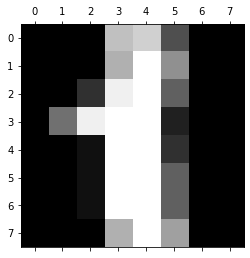

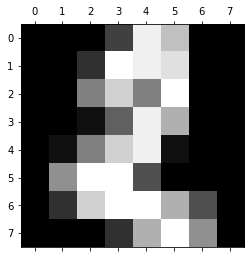

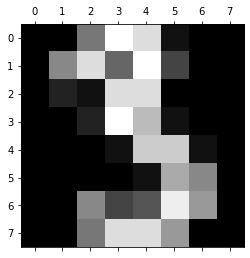

In [4]:
# Checking first four images as sample

plt.gray()
#plt.matshow(digits.images[100])
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
# Checking target values

digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### create Dataframe with daigits dataset

In [6]:
import pandas as pd              # import pandas library

df = pd.DataFrame(digits.data)
df.head()                       # Display first five Rows

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target']= digits.target  # Adding target values column to original DataFrame
df.head(11)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [8]:
X = df.drop('target',axis='columns')   # Storing all column except Target column
y = df.target                          # Storing Target value 

In [9]:
# splitting X and y into training and testing sets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# printing the shapes of the new X and y objects 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


***

<center> <h2>Logistic Regression</h2><center>

### Importing Logistic Regression from sklearn library

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# training the model on training set

model = LogisticRegression()
model.fit(X_train, y_train)           # Fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# making predictions on the testing set 

model.predict(digits.data[155:169])

array([5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8])

In [14]:
# Checking Accuracy of model

LR = model.score(X_test, y_test)    
LR

0.9388888888888889

#### Check what is image and value at position 355 and what our model is predicting

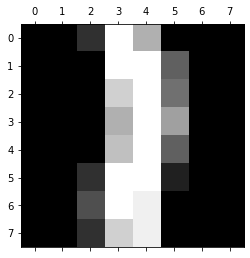

In [15]:
# Checking which image is acually exists at position 355

plt.matshow(digits.images[355])

In [16]:
# Checking which number is acually exists at position 355

digits.target[355]

1

In [17]:
# Checking what our model is predicting at position 355

model.predict([digits.data[355]])

array([1])

In [18]:
# making predictions on the testing set 

model.predict(X_test)
y_predicted = model.predict(X_test)

### Creating Confusion Matrix for visualize how much value we predict correct or False

In [19]:
from sklearn.metrics import confusion_matrix  # The confusion matrix is used to determine the performance of the classification models for a given set of test data.

In [20]:
# Confusion Matrix between original test set and predicted values

cm = confusion_matrix(y_test, y_predicted)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 34,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 28,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  1,  0],
       [ 0,  6,  0,  0,  1,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  3,  3, 26]], dtype=int64)

Text(123.0, 0.5, 'Truth')

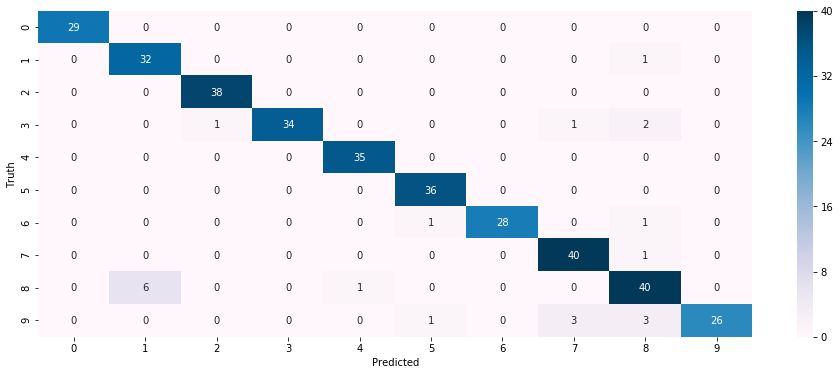

In [21]:
plt.figure(figsize=(16,6))
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<font color='green'> <h3>So you can see by above result that at position (8,6) actaul value is 8 and our model precditing it 1. and it is six times wrong prediction </h3></font>

### Checking Recall precision or support

In [22]:
from sklearn.metrics import classification_report

In [23]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.84      0.97      0.90        33
           2       0.97      1.00      0.99        38
           3       1.00      0.89      0.94        38
           4       0.97      1.00      0.99        35
           5       0.95      1.00      0.97        36
           6       1.00      0.93      0.97        30
           7       0.91      0.98      0.94        41
           8       0.83      0.85      0.84        47
           9       1.00      0.79      0.88        33

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



#### Precision: Model precision score represents the model’s ability to correctly predict the positives out of all the positive prediction it made.
#### Recall: Model recall score represents the model’s ability to correctly predict the positives out of actual positives. 

***

<center> <h2>Decision Tree Classifier</h2><center>

### import Decision tree library

In [24]:
from sklearn import tree

In [25]:
# training the model on training set

model1 = tree.DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
DT = model1.score(X_test, y_test)     # Checking Accuracy of our model by using decision tree method
DT

0.8194444444444444

In [27]:
# making predictions on the testing set 

model1.predict(X_test)
y_predicted1 = model1.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predicted1)
cm1

array([[27,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0, 27,  1,  0,  2,  0,  0,  1,  0,  2],
       [ 0,  3, 31,  0,  0,  0,  0,  1,  2,  1],
       [ 0,  1,  2, 27,  0,  3,  1,  0,  3,  1],
       [ 0,  2,  0,  0, 31,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  1,  1, 34,  0,  0,  0,  0],
       [ 1,  1,  0,  2,  2,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  1, 33,  3,  2],
       [ 2,  4,  0,  0,  1,  1,  0,  0, 39,  0],
       [ 0,  4,  0,  2,  0,  1,  0,  3,  1, 22]], dtype=int64)

Text(123.0, 0.5, 'Truth')

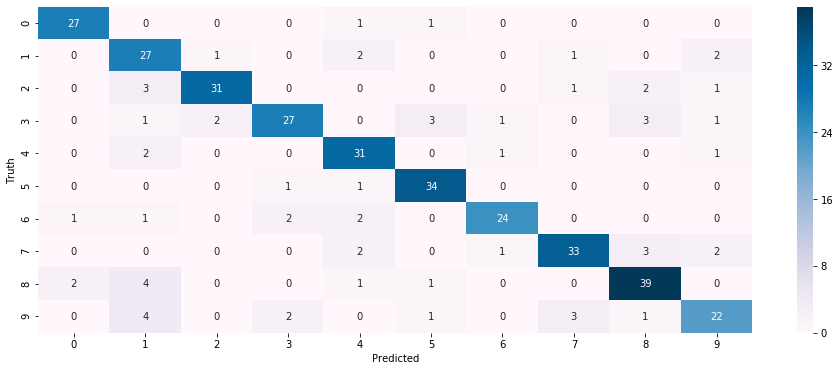

In [29]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.heatmap(cm1, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
from sklearn.metrics import classification_report

In [31]:
predictions1 = model1.predict(X_test)
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.64      0.82      0.72        33
           2       0.91      0.82      0.86        38
           3       0.84      0.71      0.77        38
           4       0.78      0.89      0.83        35
           5       0.85      0.94      0.89        36
           6       0.89      0.80      0.84        30
           7       0.87      0.80      0.84        41
           8       0.81      0.83      0.82        47
           9       0.76      0.67      0.71        33

    accuracy                           0.82       360
   macro avg       0.83      0.82      0.82       360
weighted avg       0.83      0.82      0.82       360



In [32]:
clf = tree.DecisionTreeClassifier(random_state=0)

[Text(251.1922590501238, 631.9350000000001, 'X[36] <= 0.5\ngini = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]'),
 Text(67.12574257425744, 591.1650000000001, 'X[28] <= 2.5\ngini = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]'),
 Text(34.805940594059415, 550.395, 'X[21] <= 0.5\ngini = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]'),
 Text(24.861386138613867, 509.625, 'X[6] <= 1.0\ngini = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]'),
 Text(19.889108910891093, 468.855, 'X[29] <= 1.0\ngini = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]'),
 Text(14.916831683168319, 428.08500000000004, 'X[44] <= 8.0\ngini = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]'),
 Text(9.944554455445546, 387.31500000000005, 'X[37] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(4.972277227722773, 346.545, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),

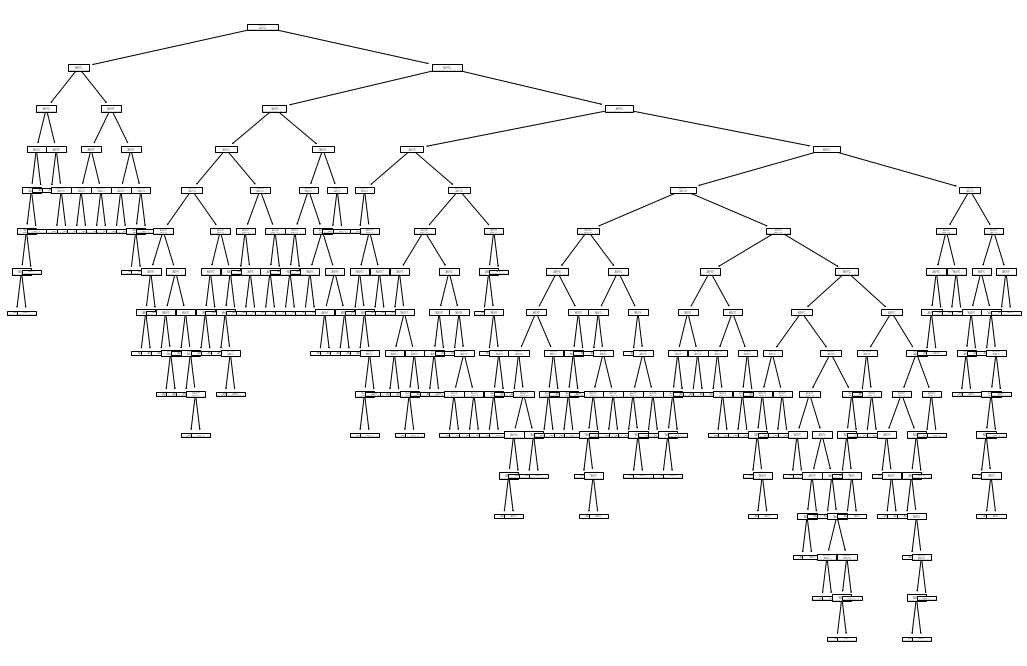

In [33]:
plt.figure(figsize = (18,12))
clf = clf.fit(digits.data, digits.target)
tree.plot_tree(clf)

***

<center> <h2>SVM</h2><center>

### import SVM library

In [34]:
from sklearn.svm import SVC

In [35]:
# model2 = SVC()
model2 = SVC(kernel='linear')
model2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
SV = model2.score(X_test, y_test)      # Checking Accuracy of our model by using SVM method
SV

0.9583333333333334

In [37]:
# making predictions on the testing set 

model2.predict(X_test)
y_predicted2 = model2.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predicted2)
cm2

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 35,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 28,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 40,  0,  0],
       [ 0,  4,  0,  0,  1,  1,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 31]], dtype=int64)

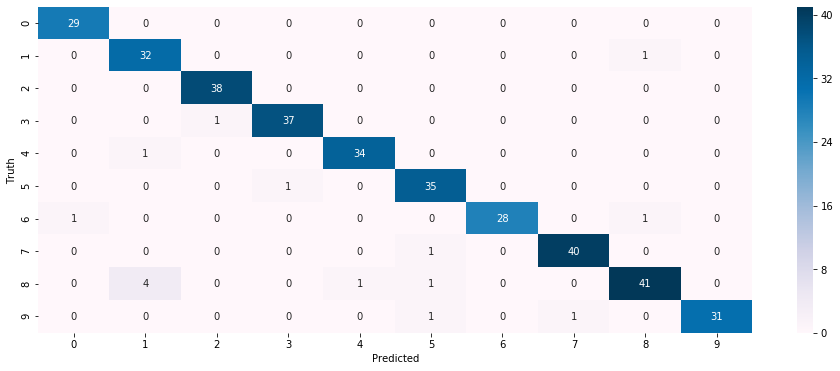

In [39]:
plt.figure(figsize=(16,6))
sns.heatmap(cm2, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [40]:
from sklearn.metrics import classification_report

In [41]:
predictions2 = model2.predict(X_test)
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.86      0.97      0.91        33
           2       0.97      1.00      0.99        38
           3       0.97      0.97      0.97        38
           4       0.97      0.97      0.97        35
           5       0.92      0.97      0.95        36
           6       1.00      0.93      0.97        30
           7       0.98      0.98      0.98        41
           8       0.95      0.87      0.91        47
           9       1.00      0.94      0.97        33

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



***

<center> <h2>Random Forest Classifier</h2><center>

### import RandomForest library

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model3 = RandomForestClassifier(30)
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
RF = model3.score(X_test, y_test)         # Checking Accuracy of our model by using RandomForest
RF

0.975

In [49]:
# making predictions on the testing set 

model3.predict(X_test)
y_predicted3 = model3.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predicted3)
cm3

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0, 35,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 31]], dtype=int64)

Text(123.0, 0.5, 'Truth')

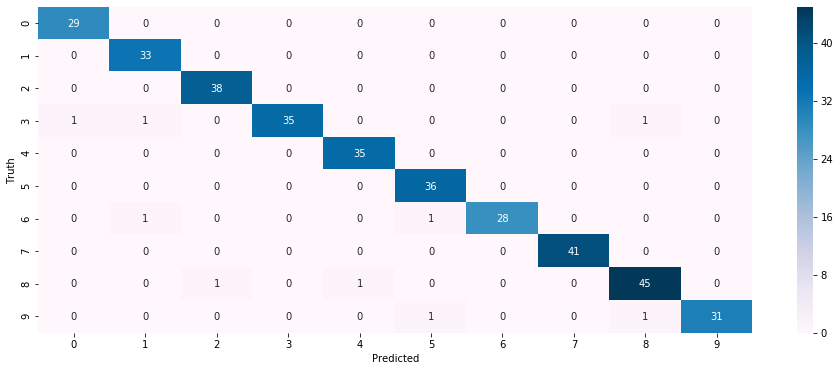

In [51]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.heatmap(cm3, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
from sklearn.metrics import classification_report

In [53]:
predictions3 = model3.predict(X_test)
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.94      1.00      0.97        33
           2       0.97      1.00      0.99        38
           3       1.00      0.92      0.96        38
           4       0.97      1.00      0.99        35
           5       0.95      1.00      0.97        36
           6       1.00      0.93      0.97        30
           7       1.00      1.00      1.00        41
           8       0.96      0.96      0.96        47
           9       1.00      0.94      0.97        33

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



***

<font color="red"><h3>Comparing All model and Checking Accuracy</h3></font>

Logistic Regression Accuracy 0.939 %
Dicision Tree Accuracy 0.819 %
SVM Accuracy 0.958 %
Random Forest Accuracy 0.975 %


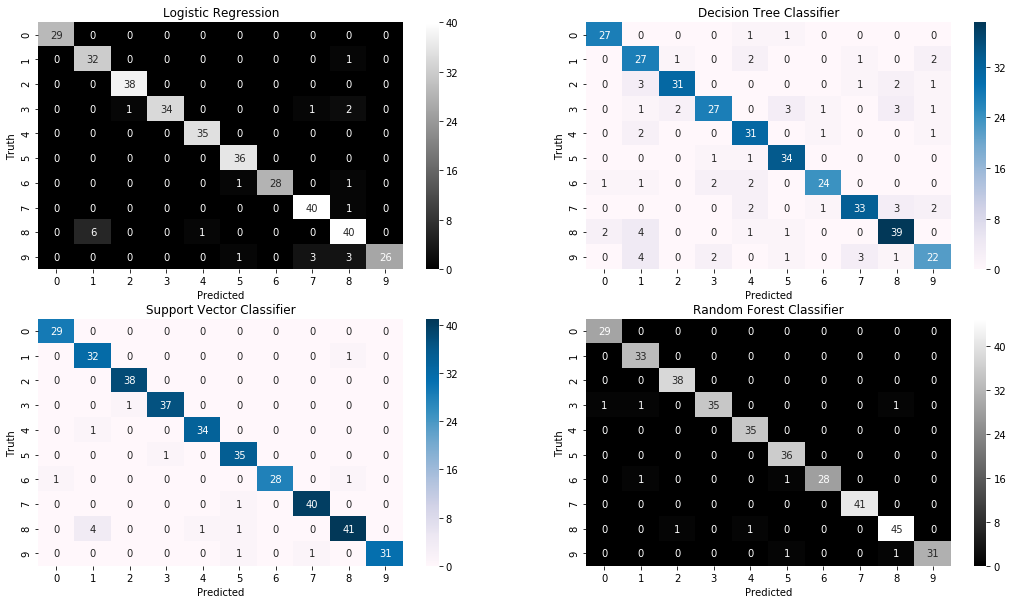

In [54]:
plt.figure(figsize=(18,10))               # Set image graph size
plt.subplot(2,2,1)                        # Create suboplot instance
plt.title('Logistic Regression')          # Provide title to plot
sns.heatmap(cm, annot=True, cmap='gray')  # Use ConfusionMatrix
plt.xlabel('Predicted')                   # Gave title to X-axis
plt.ylabel('Truth')                       # Gave title to y-axis
print("Logistic Regression Accuracy",str(LR.round(3)) + ' %')  # Print Accuracy of model

plt.subplot(2,2,2)
plt.title('Decision Tree Classifier')
sns.heatmap(cm1, annot=True, cmap='PuBu')  # Use confusion matrix of Decision Tree
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("Dicision Tree Accuracy",str(DT.round(3)) + ' %')        # Print Accuracy of model

plt.subplot(2,2,3)
plt.title('Support Vector Classifier')
sns.heatmap(cm2, annot=True, cmap='PuBu')  # Use confusion matrix of SVM
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("SVM Accuracy",str(SV.round(3)) + ' %')        # Print Accuracy of model

plt.subplot(2,2,4)
plt.title('Random Forest Classifier')
sns.heatmap(cm3, annot=True, cmap='gray') # Use confusion matrix of Random Forest
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("Random Forest Accuracy",str(RF.round(3)) + ' %')        # Print Accuracy of model
plt.show()

***

## Accuracy:
###  Logistic Regression Accuracy 0.939 %
###  Dicision Tree Accuracy 0.819 %
###  SVM Accuracy 0.958 %
###  Random Forest Accuracy 0.975 %

<font color='blue'><h1>Findings : </h1></font>
<font color='gray'><h2>After seeing above result by use different model we find that Random forest gives us better accuracy result.<br><br> So, this doesn't mean that others method is not usefull. All method have their own places to train an predict output <br><br> Decision Tree is useful to put those column who have multicolinearity between independent features but we don't want to drop them .<br><br>It's depends on your requirement what type of output you want</h2></font>

***

<center><h3>END<h3></center>

***

<center> <h2>K-Folds Cross validation</h2><center>

### import library

In [55]:
import numpy as np
from sklearn.model_selection import cross_val_score

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
s1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target, cv=5)
s1

array([0.92307692, 0.88121547, 0.94986072, 0.95798319, 0.89295775])

In [58]:
np.average(s1)  # Accuracy of our model by using Kfold method

0.9210188113360701

## SVM Accuracy

In [59]:
from sklearn.svm import SVC

In [60]:
s2 = cross_val_score(SVC(gamma='auto'), digits.data, digits.target, cv=5)
s2

array([0.43406593, 0.40883978, 0.41504178, 0.48739496, 0.49859155])

In [61]:
np.average(s2)    # Accuracy of our model by using Kfold method

0.44878680061604637

## Random Forest accuracy

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
s3 = cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target, cv=5)
s3

array([0.91483516, 0.91436464, 0.9637883 , 0.95518207, 0.91549296])

In [68]:
np.average(s3)    # Accuracy of our model by using Kfold method

0.9327326274260817

***